## Setup


In [0]:
%tensorflow_version 1.x

In [0]:
import os
import shutil
import tensorflow as tf
import google.colab as colab
from tensorflow.contrib import keras
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
L = keras.layers
K = keras.backend
import time
import zipfile
import json
from collections import defaultdict
import re
import random
from random import choice
import collections
import pickle
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
import warnings
warnings.filterwarnings('ignore')

In [3]:
def mount_google_drive():
	'''
	# Functionality
		Mount google drive. Since colab does not save files, we want to make it easier to directly access files in google drive.
	# Arguments
		Nothing
	# Returns
		drive_root: the working directory mounted
	'''
	mount_directory = "/content/gdrive"
	drive = colab.drive
	drive.mount(mount_directory, force_remount=True)
	drive_root = mount_directory + "/" + list(filter(lambda x: x[0] != '.', os.listdir(mount_directory)))[0]
	return drive_root


ROOT_DIR =  mount_google_drive()
CHECKPOINT_ROOT = ROOT_DIR+ "/FYDP/captioning/checkpoints/"
DATASET_DIR = ROOT_DIR + "/FYDP/Dataset/"

if not os.path.exists(DATASET_DIR):
  os.makedirs(DATASET_DIR)

if not os.path.exists(CHECKPOINT_ROOT):
  os.makedirs(CHECKPOINT_ROOT)

def get_checkpoint_path(epoch=None):
    if epoch is None:
        return os.path.abspath(CHECKPOINT_ROOT + "weights")
    else:
        return os.path.abspath(CHECKPOINT_ROOT + "weights_{}".format(epoch))
      
# example of checkpoint dir
print(get_checkpoint_path(4))

Mounted at /content/gdrive
/content/gdrive/My Drive/FYDP/captioning/checkpoints/weights_4


In [0]:
!rm -r utils
!rm config.py
!rm model.py

In [5]:
shutil.copytree(ROOT_DIR + "/FYDP/utils/", "utils/")
shutil.copy(ROOT_DIR + "/FYDP/model.py", "model.py")
shutil.copy(ROOT_DIR + "/FYDP/config.py", "config.py")

'config.py'

In [6]:
from utils.file_utils import *
from utils.image_utils import *
from utils.generator_utils import *
from utils.tqdm_utils import *
from utils.keras_utils import *

from config import config
from model import *

Using TensorFlow backend.


## DEMO

In [7]:
with open(DATASET_DIR + 'vocab.json', 'r') as fp:
    vocab = json.load(fp) 
len(vocab)

6375

In [0]:
model = Model(config=config, vocab=vocab, input_data=None, pad_idx=vocab["#PAD#"], checkpoint_epoch=49)

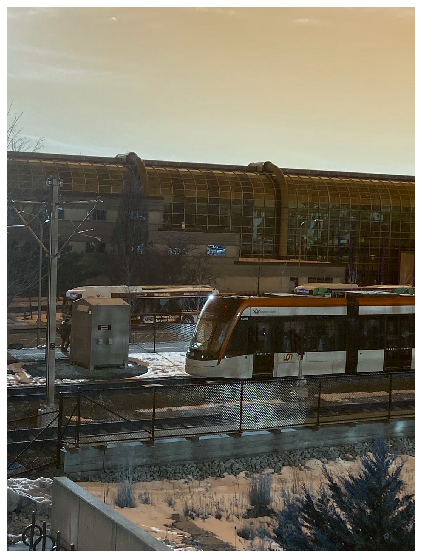

a train crossing a bridge over a river


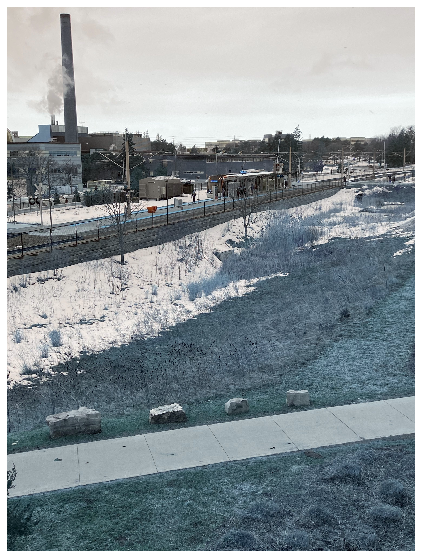

a view of a street with a lot of people on it


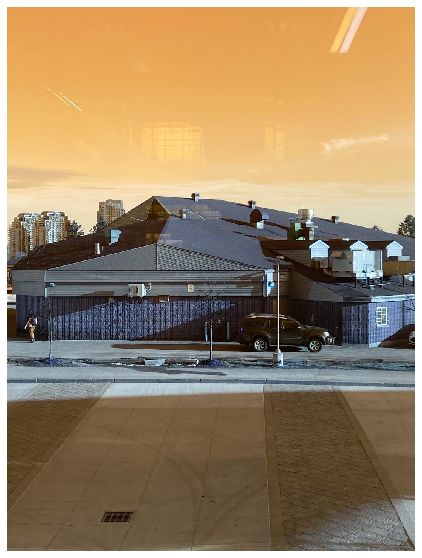

a parking meter with a sign on it and a building in the background


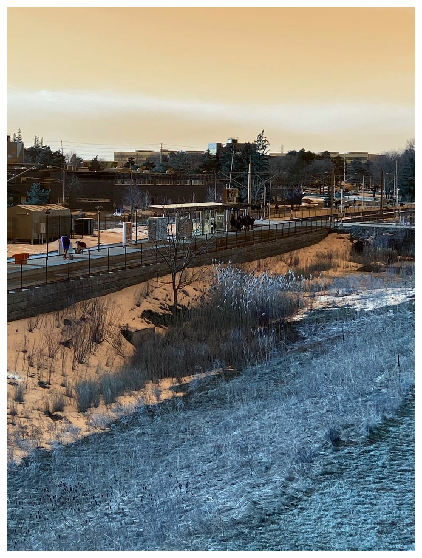

a view of a river with a bridge in the background


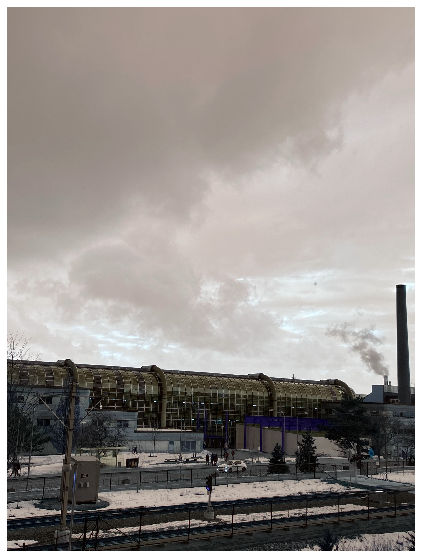

a large building with a clock tower in the foreground


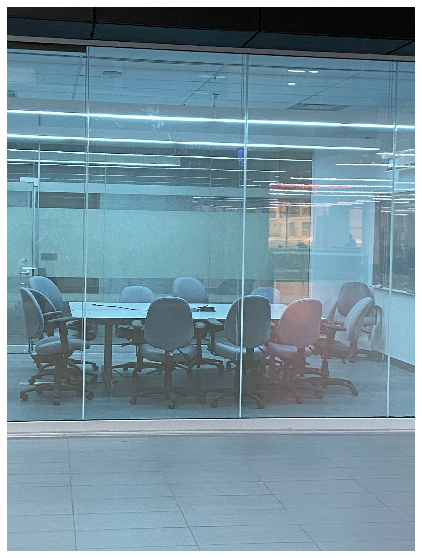

a room with a lot of windows and a coffee table


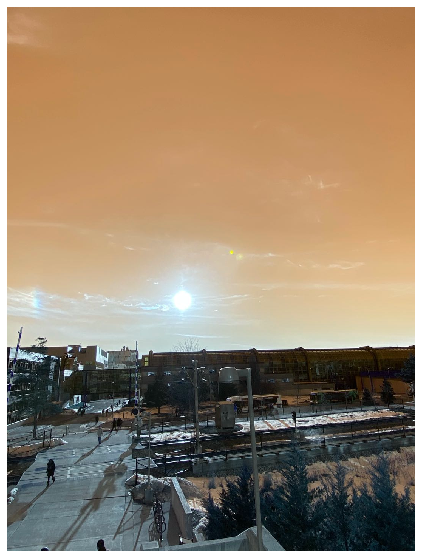

a group of people riding boats on a lake


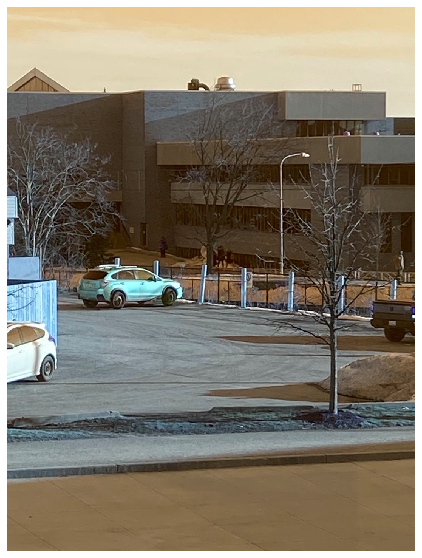

a parking lot with a lot of street signs on it


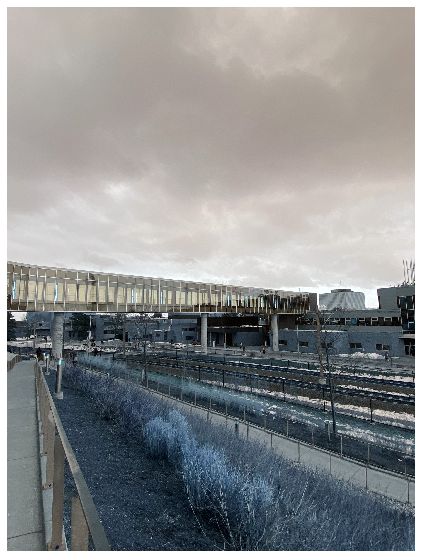

a train yard with a train track and a bridge


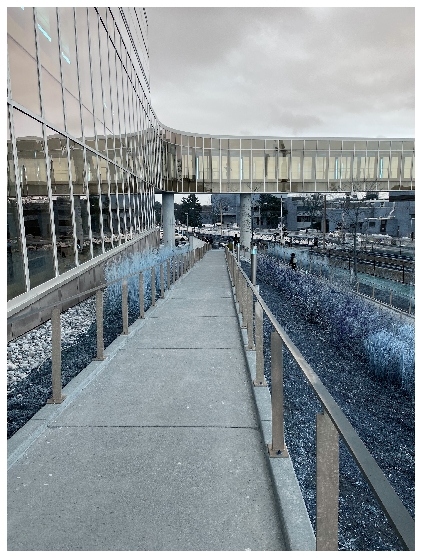

a black and white photo of a person walking by a bench


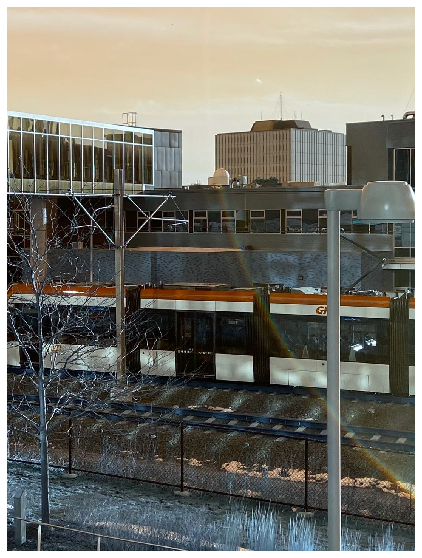

a train station with a train on it


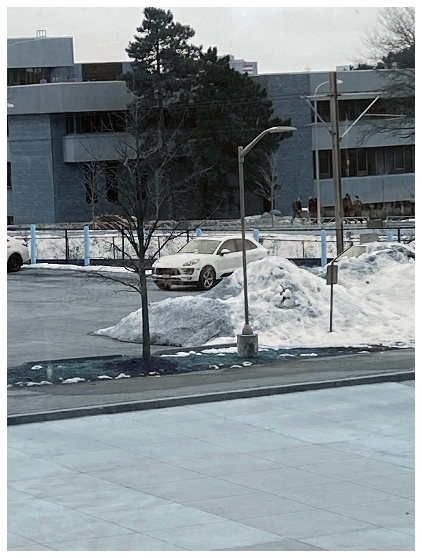

a street sign on a wooden pole on the side of the road


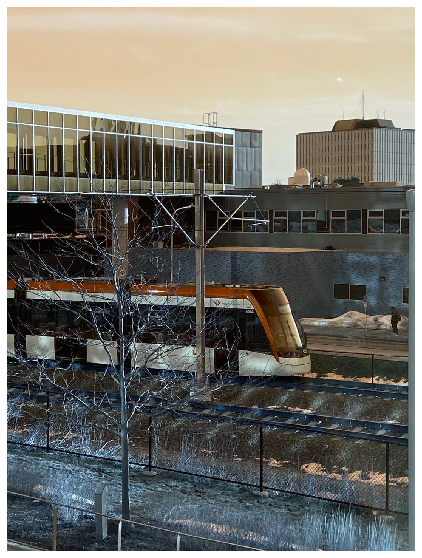

a train is going down the tracks near a bridge


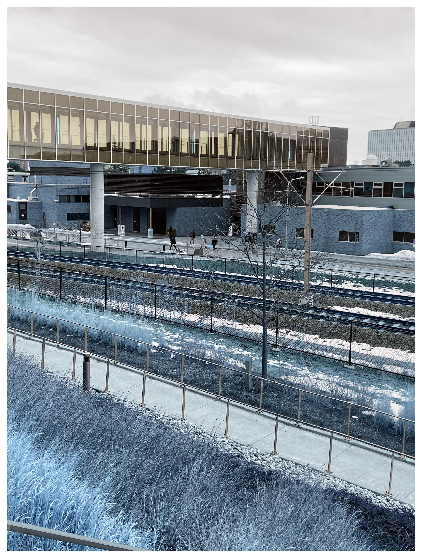

a train yard with a train going down the track


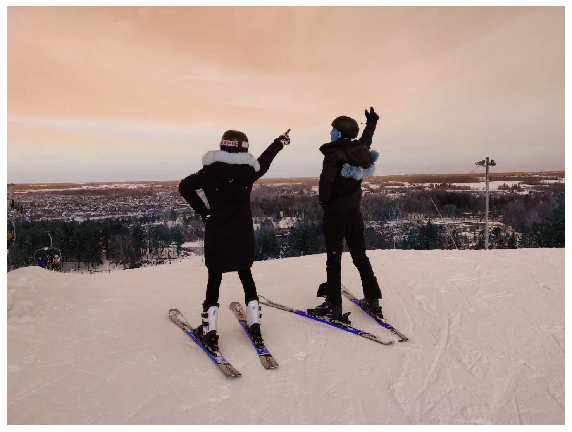

a group of people on skis in the snow


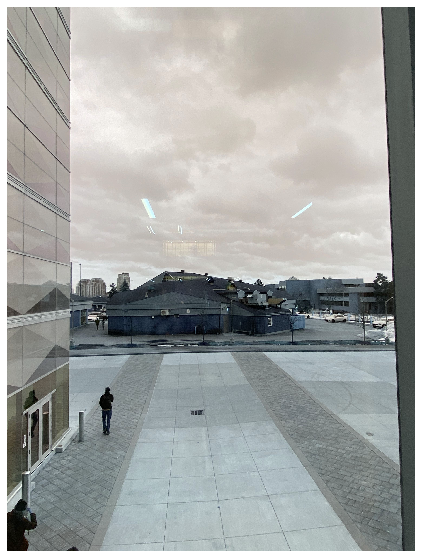

a group of people walking on a city street


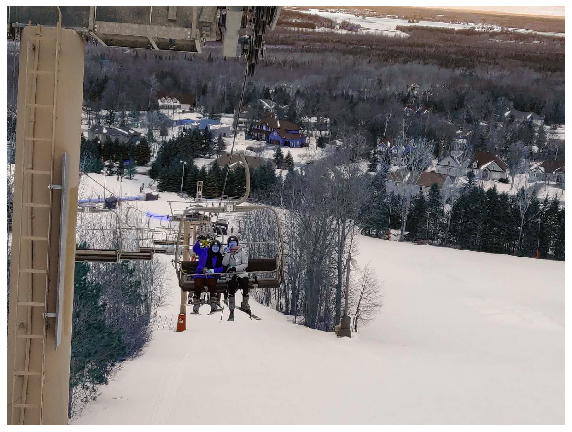

a person is skiing in the snow with a mountain in the background


In [10]:
# test_img_dir = DATASET_DIR + "test_images/" # from boyang photography

test_img_dir = DATASET_DIR + "floor_2_images/"
random_image_paths = random.sample(get_all_files_from_dir(test_img_dir), 17)

for file in random_image_paths:
  model.inference(cv2.imread(file))

In [0]:
# model likes train very much..i mean...maybe too much